# Importing libraries

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


# Importing Dataset

In [ ]:
dataset=pd.read_csv('train.csv')

In [ ]:
dataset.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [ ]:
dataset.isnull().sum()

x    0
y    1
dtype: int64

In [ ]:
dataset=dataset.dropna()

In [ ]:
dataset.shape

(699, 2)

# Visualizing relationship


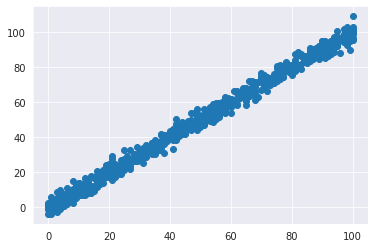

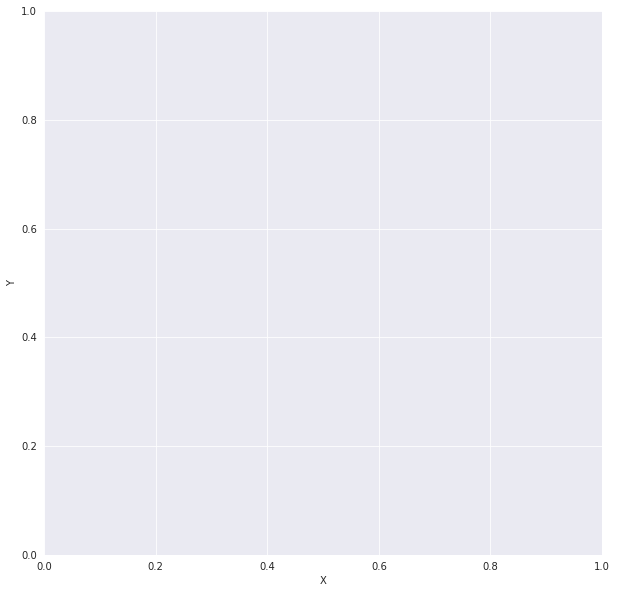

In [ ]:
plt.scatter(x='x',y='y',data=dataset)
plt.figure(figsize=(10,10))
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Splitting dataset into train and test

In [ ]:
Train= dataset[:500]
Test=dataset[500:]

In [ ]:
Train.shape

(500, 2)

In [ ]:
Test.shape

(199, 2)

In [ ]:
# Assigning x and y variable for both train and test
X_train=np.array(Train['x'])
X_test=np.array(Test['x'])

In [ ]:
y_train=np.array(Train['y'])
y_test=np.array(Test['y'])

In [ ]:
# to check the dimension of X_test and X_train
X_train.ndim

1

In [ ]:
X_test.ndim

1

In [ ]:
# to convert from 1D to a 2D array
X_train=X_train.reshape(-1,1)
X_test=X_test.reshape(-1,1)

In [ ]:
X_train.ndim

2

# Building and training the model

In [ ]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()

In [ ]:
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred=regressor.predict(X_test)

In [ ]:
y_pred

array([ 4.76896187, 60.82492252, 46.81093236, 97.86189652, 29.7939443 ,
       62.82692111, -0.23603461, 99.86389511, 17.78195274, 29.7939443 ,
       97.86189652, 15.77995414, 21.78594992, 54.81892673, 42.80693517,
       74.83891268, 90.85490143, 45.80993306, 84.84890565, 54.81892673,
       35.79994009, 48.81293095, 93.85789933, 42.80693517, 21.78594992,
       36.80093938, 23.78794852, 94.85889862, 60.82492252, 74.83891268,
       67.8319176 , 57.82192463,  4.76896187, 52.81692814, 79.84390916,
       82.84690706, 24.78894782, 33.79794149, 25.78994711, 89.85390214,
       59.82392322, 48.81293095, 18.78295203, 91.85590073, 28.79294501,
        7.77195976, 56.82092533, 28.79294501, 18.78295203, 80.84490846,
       49.81393025, 14.77895484, 69.83391619, 38.80293798, 42.80693517,
       20.78495063, 97.86189652, 85.84990495, 15.77995414, 24.78894782,
       30.7949436 , 92.85690003, 66.8309183 , 48.81293095, 24.78894782,
       87.85190354, 53.81792744, 20.78495063,  7.77195976, 31.79

In [ ]:
regressor.coef_

array([1.0009993])

In [ ]:
regressor.intercept_

-0.2360346148878989

# To calculate the mean squared error

In [ ]:
error=y_test-y_pred

In [ ]:
error=error**2

In [ ]:
error.mean()

8.030031591835376

# Model Validation

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
r2_score(y_test,y_pred)

0.9908545372287157

In [ ]:
mean_squared_error(y_test,y_pred)

8.030031591835376

# Plotting for Train result

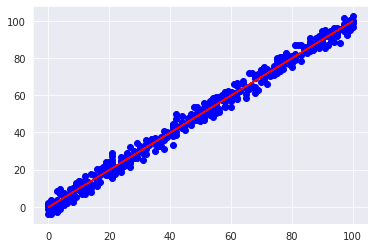

In [ ]:
plt.scatter(X_train,y_train, color='blue')
plt.plot(X_train,regressor.predict(X_train), color='red')

# Plotting for Test result

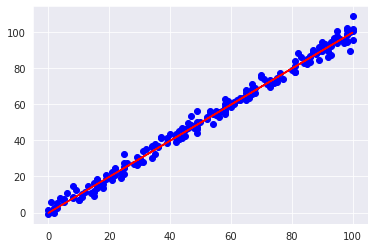

In [ ]:
plt.scatter(X_test,y_test, color='blue')
plt.plot(X_train,regressor.predict(X_train), color='red')

# Testing on a new dataset

In [ ]:
lala= pd.read_csv('test.csv')

In [ ]:
lala.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [ ]:
lala.shape

(300, 2)

In [ ]:
test=np.array(lala['x'])
original=np.array(lala['y'])

In [ ]:
test.ndim

1

In [ ]:
test=test.reshape(-1,1)


In [ ]:
test.ndim

2

# Comparing result of original and predicted

In [ ]:
prediction=regressor.predict(test)

In [ ]:
result=pd.DataFrame([prediction,original])

In [ ]:
result.transpose()

,0,1
0,76.840911,79.775152
1,20.784951,23.177279
2,21.785950,25.609262
3,19.783951,17.857388
4,35.799940,41.849864
...,...,...
295,70.834915,68.545888
296,45.809933,47.334876
297,54.818927,54.090637
298,61.825922,63.297171


In [ ]:
r2_score(original,prediction)

0.9887052056307712

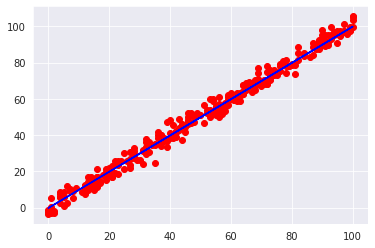

In [ ]:
plt.scatter(test, original, color='red')
plt.plot(X_train, regressor.predict(X_train),color='blue')